# **Objective of Part 1:**

* Create three logical layers/zones: landing zone, curated zone, and consumption zone.
* Emphasize a layered approach using separate schemas.
* Create tables within the landing zone schema.
* Load initial data using the legacy web UI.
* Verify table creation and data presence.

## **Creating Schemas:**

Three schemas are established: landing zone, curated zone, and consumption zone.
Schemas reside within the database "chk."


In [ ]:
create database chk;
create or replace schema landing_zone;
create or replace schema curated_zone;
create or replace schema consumption_zone;


## **Trasient Tables:**

In Snowflake, transient tables serve a specific purpose within the data processing ecosystem. The primary purpose of transient tables is to provide a temporary storage solution for intermediate or temporary data during processing tasks. Here's an overview of the purpose and characteristics of transient tables in Snowflake:

1. Temporary Data Storage:
  Transient tables are designed to hold temporary data that is needed for intermediate steps in data processing workflows. They are not intended for long-term storage of persistent data.

2. Faster Query Performance:
  Transient tables are stored in memory, which can lead to faster query performance when compared to traditional on-disk storage. This is especially useful for temporary data that is frequently accessed.

3. Optimized for Query Parallelism:
Transient tables are optimized for concurrent access and query parallelism. This makes them well-suited for scenarios where multiple users or processes need to work with the same data simultaneously.

4. Automatic Deletion:
Transient tables have a built-in automatic data retention policy. Data in transient tables is automatically deleted after a certain period of inactivity, usually 24 hours. This ensures that these tables do not clutter the storage and are used for their intended short-term purposes.

5. Use Cases:
Transient tables are commonly used in scenarios such as data staging, intermediate results storage, temporary data transformations, and other situations where data needs to be temporarily held during processing.

**Considerations:**

* Transient tables are not suitable for long-term data storage or critical data preservation.
* If you need to persist data for longer periods, you should use regular (non-transient) tables.
* Transient tables are usually faster for query processing but might consume more compute resources due to their in-memory nature.



## **Table Creation in Landing Zone:**

* Item, customer, and order tables are created within the landing zone.
* Tables are transient, suitable for loading data.
* Fields are set as varchar to accommodate diverse data in the landing zone.

In [ ]:
use schema landing_zone;
create or replace transient table landing_item (
        item_id varchar,
        item_desc varchar,
        start_date varchar,
        end_date varchar,
        price varchar,
        item_class varchar,
        item_CATEGORY varchar
) comment ='this is item table with in landing schema';

create or replace transient table landing_customer (
    customer_id varchar,
    salutation varchar,
    first_name varchar,
    last_name varchar,
    birth_day varchar,
    birth_month varchar,
    birth_year varchar,
    birth_country varchar,
    email_address varchar
) comment ='this is customer table with in landing schema';

create or replace transient table landing_order (
    order_date varchar,
    order_time varchar,
    item_id varchar,
    item_desc varchar,
    customer_id varchar,
    salutation varchar,
    first_name varchar,
    last_name varchar,
    store_id varchar,
    store_name varchar,
    order_quantity varchar,
    sale_price varchar,
    disount_amt varchar,
    coupon_amt varchar,
    net_paid varchar,
    net_paid_tax varchar,
    net_profit varchar
) comment ='this is order table with in landing schema';


## **File Format Creation:**

* A file format is established under the landing zone schema.
* File format settings are configured to skip headers during data loading.

In [ ]:
create or replace file format my_csv_vi_webui
type = 'csv'
compression = 'auto'
field_delimiter = ','
record_delimiter = '\n'
skip_header = 1
field_optionally_enclosed_by = '\042'
null_if = ('\\N');


## **Data Loading via Legacy Web UI:**

* Order, customer, and item data sets are loaded using the legacy web UI.
* File format created earlier is utilized during data loading.


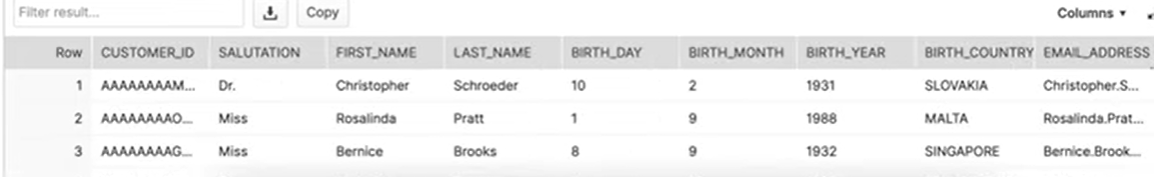

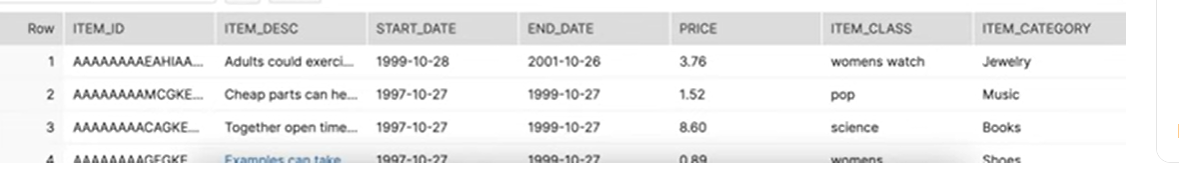

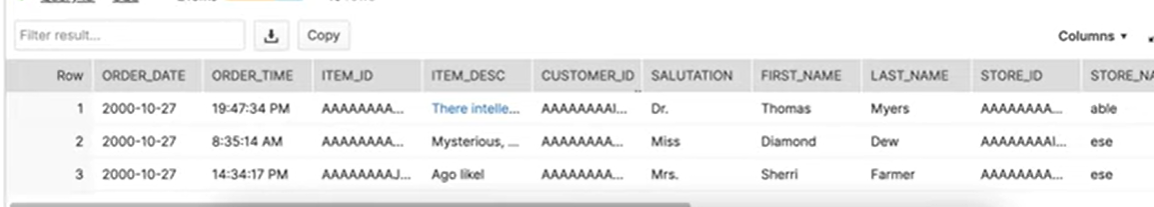

**Data Verification:**

* Use SHOW TABLES command to check table creation and row count.
* Data is confirmed to be successfully loaded into the respective tables.


**Loading History Check:**

* The Snowflake web console can be used to review loading history.
* Loading history is unavailable in the legacy web UI.
* The history shows loading dates for items and orders.

**Conclusion of Part 1:**

* Initial data loading into the landing zone schema is complete.
* Tables for items, customers, and orders are populated with historical data.
* Part 2 will involve table creation in the curated zone.